In [1]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# objective -using experience develop ML model to predict salary

In [5]:
# data
data = pd.read_csv('salarydata.csv')
print('Data imported')

Data imported


In [6]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
data.shape

(30, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [9]:
# seperate the independent var and dependent var
# using iloc X and y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [10]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print(X_train.shape)

(21, 1)


In [12]:
print(X_test.shape)

(9, 1)


In [13]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [14]:
# training
regressor.fit(X_train, y_train) # m and c using least square method
print('Training completed')

Training completed


In [15]:
regressor.coef_

array([9339.08172382])

In [17]:
regressor.intercept_

25918.438334893202

In [18]:
### salary = 9339.08172382 * exp + 25918.438334893202

In [19]:
# predict 
y_pred = regressor.predict(X_test)
y_pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [20]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
Name: Salary, dtype: float64

In [21]:
# compute the error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# calculate the train accurracy
y_pred_train = regressor.predict(X_train)
print('R2 score on training data is', r2_score(y_train, y_pred_train))

R2 score on training data is 0.9574526669392872


In [23]:
# compute mse
print('MSE is', mean_squared_error(y_test, y_pred))

MSE is 37784662.46621314


In [24]:
print('RMSE is', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE is 6146.92300799458


In [25]:
print('R2 score is', r2_score(y_test, y_pred))

R2 score is 0.9414466227178214


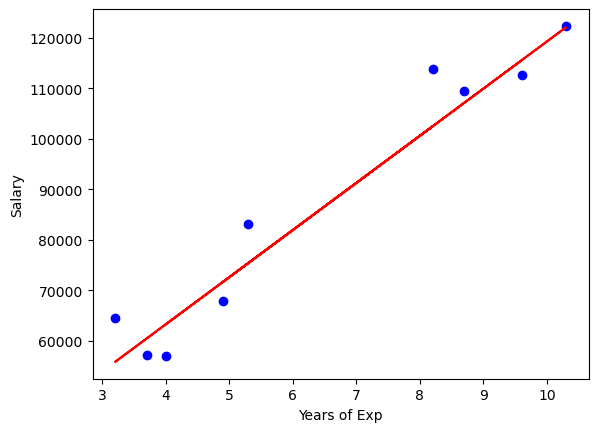

In [26]:
# visualize the results
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.show()

In [27]:
# save the model
import joblib
joblib.dump(regressor, 'pred_salary_model.pkl')
print('model saved')

model saved


In [28]:
# load the file
model = joblib.load('pred_salary_model.pkl')
print('model loaded')

model loaded


In [29]:
# real time pred
exp = 5
pred_salary = model.predict([[exp]])
print('for {} exp the salary should be {}'.format(exp, pred_salary))

for 5 exp the salary should be [72613.84695397]


/Users/deepthy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
